# Business Goal:
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
## The company wants to know:
Which variables are significant in predicting the price of a house, and 

How well those variables describe the price of a house.

# Assigment Approach

### Section 1: Data understanding, Preparation & EDA  - 
This includes reading, understanding, Visualizing data & creating dummy variables.

### Section 2: Model Building 
This section includes steps for splitting data into traiing & test dataset, Scaling and normalizing data, fitting models ( Lasso & Ridge regression)

### Section 3: Hypeparameter Tuning
Selecting optimal value of Lambda for efficiency.

## Import required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


In [2]:
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Section 1: Data Preparation
## section 1.1 Reading, understanding and cleaning the data

In [3]:
house_df1 = pd.read_csv('train.csv')

In [4]:
house_df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# We see that some 'NA' values which are legal values are replaed by 'NaN' after reading the sheet. We need to re-read this 
#to reflect correct values.
house_df1 = pd.read_csv('train.csv',keep_default_na=False)
house_df1.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [6]:
house_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [7]:
# check NaN in each columns
house_df1.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [8]:
#Looking at some columns,they have interger values but it actually are categorical  
#variables. These need to be converted to object, some numeric clumns are marked as Object and need to be converted to Numeric else they would give incorrect analysis.Such columns are -
#MSSubClass, OverallQual, OverallCond,LotFrontage,MasVnrArea.
house_df1[['MSSubClass','OverallQual', 'OverallCond']] = house_df1[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
house_df1['LotFrontage'] = pd.to_numeric(house_df1['LotFrontage'], errors='coerce')
house_df1['MasVnrArea'] = pd.to_numeric(house_df1['MasVnrArea'], errors='coerce')

In [9]:
house_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [10]:
house_df1.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [11]:
## Replacing missing values in the above meniioned two columns by their means
house_df1['LotFrontage'].fillna(house_df1['LotFrontage'].mean(), inplace=True)
house_df1['MasVnrArea'].fillna(house_df1['MasVnrArea'].mean(), inplace=True)

In [12]:
house_df1.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [13]:
# Check description to see how NUmeric values are spread
house_df1.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,22.024023,9981.264932,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,70.049958,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
# Lets divide original dataset in Categorical and Numerical variables.
## Extract numerical columns
house_num = house_df1.select_dtypes(include=['int64', 'float64'])
## Extract categorical columns
house_cat = house_df1.select_dtypes(include='object')
house_num.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [15]:
house_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,2003,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


## Section 1.2 Visualize the data

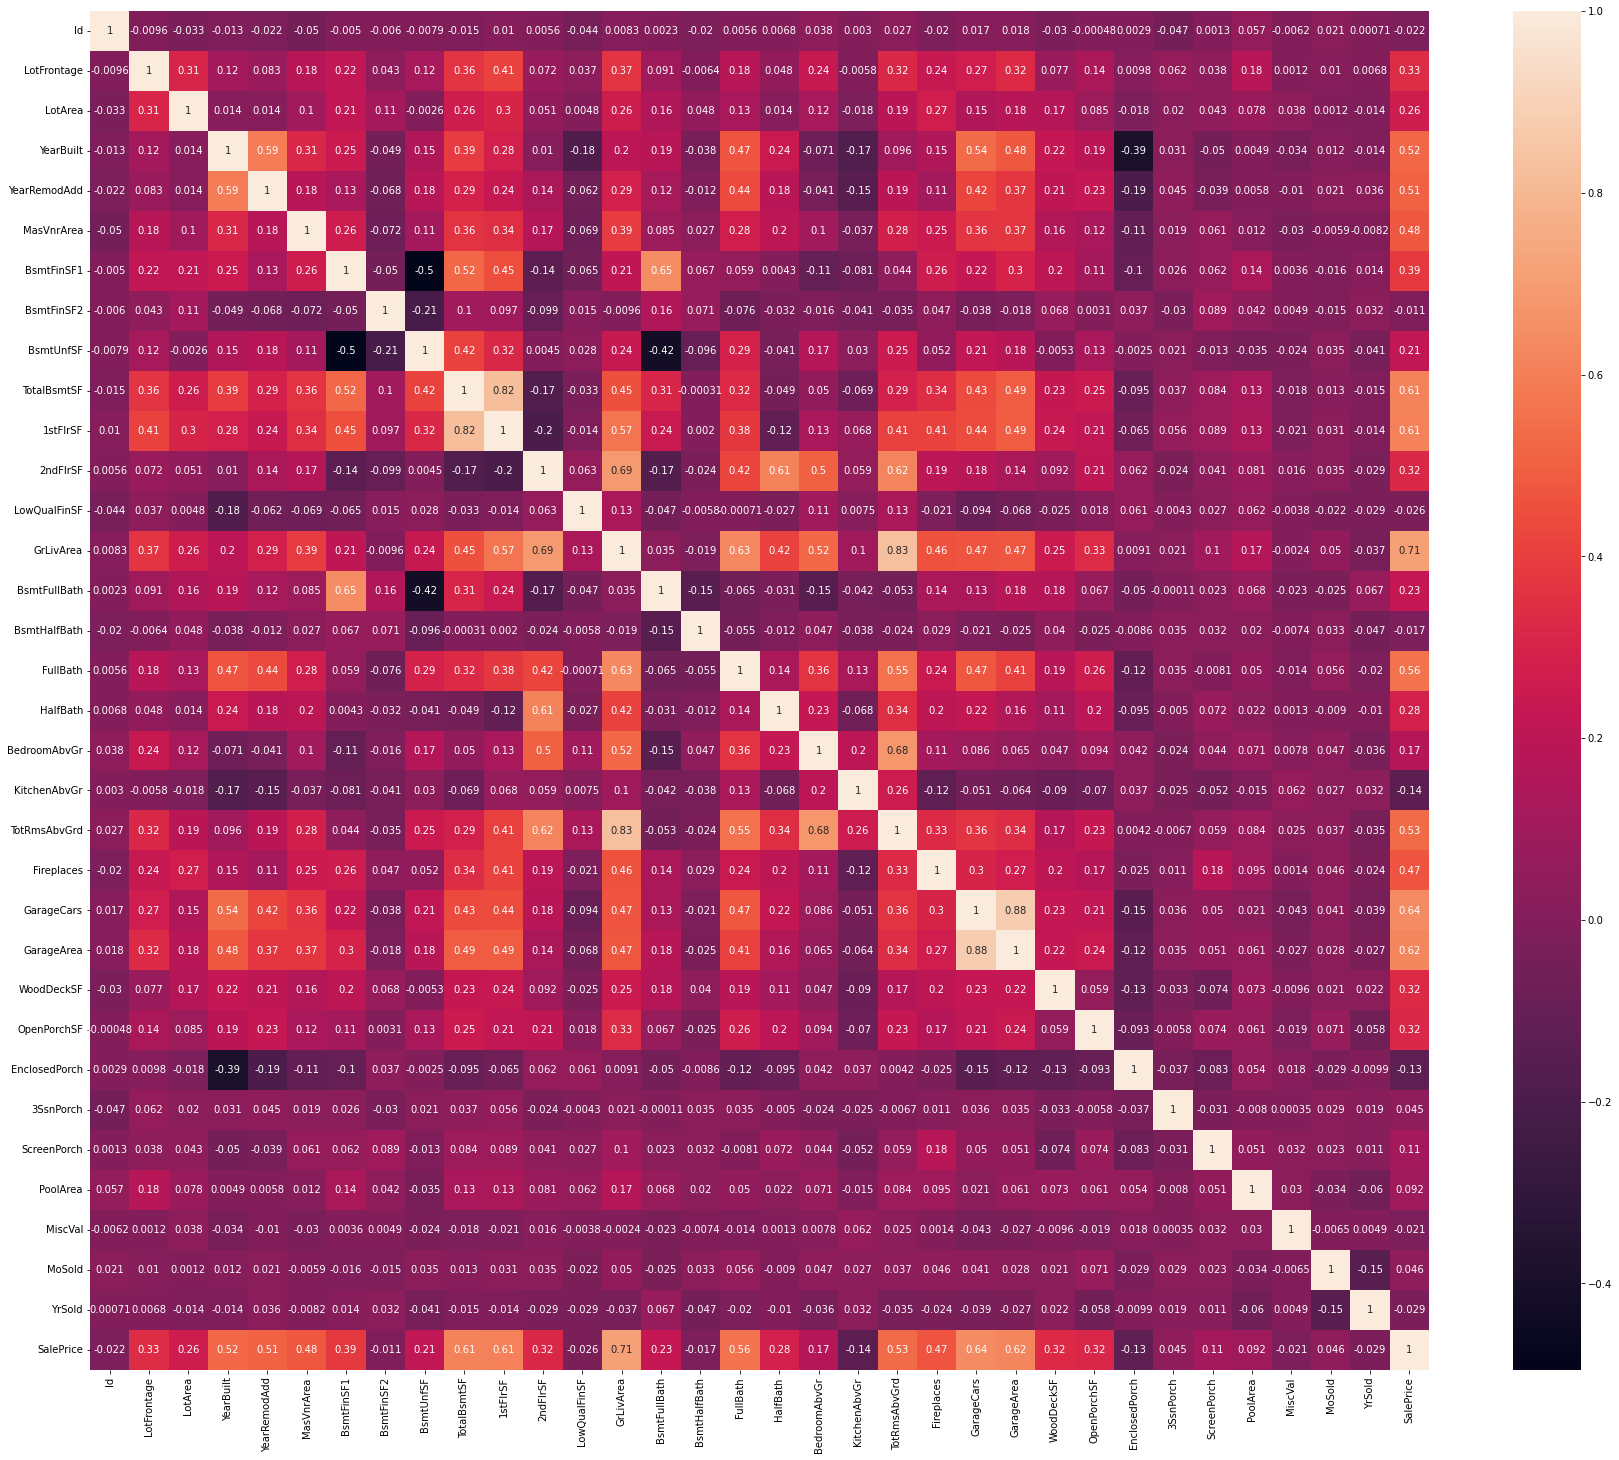

In [16]:
#Check correlation of NUmerical variables
plt.figure(figsize=(30,25))
house_corr = house_num.corr() 
sns.heatmap(house_corr, annot=True);

In [17]:
# We see that Price is highly correlated with -  GrLivArea, GarageCars and GarageArea variables.

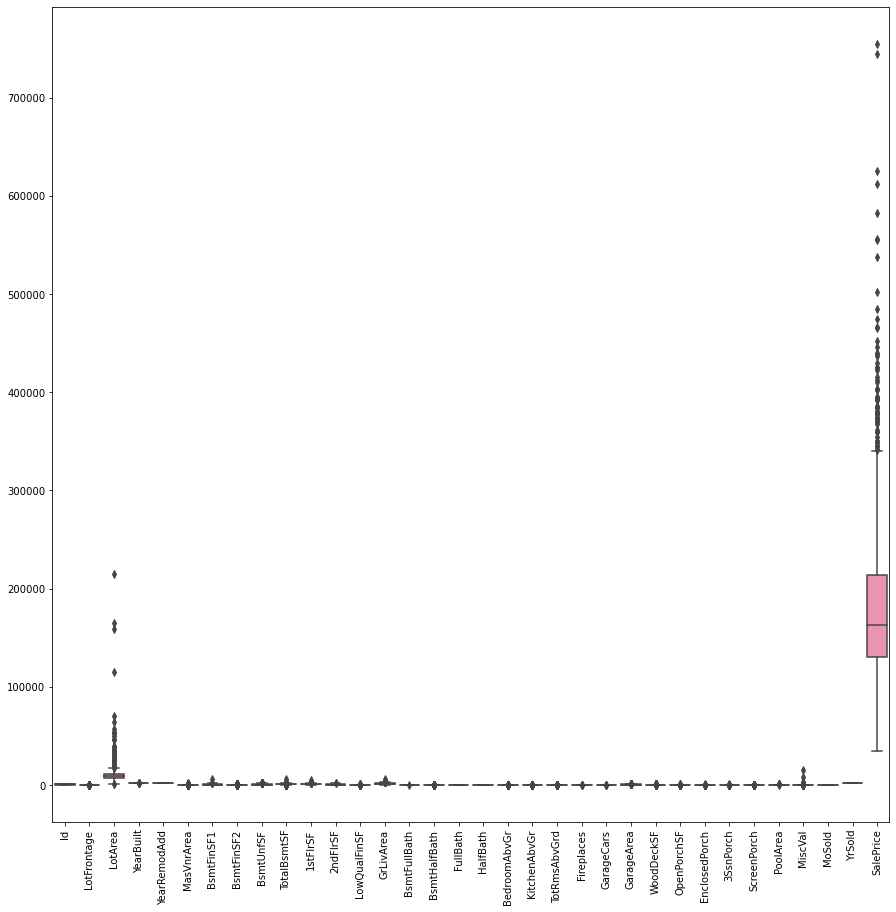

In [18]:
# Lets now remove outliers from Numeric data
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=house_num);

In [19]:
## Lets remove outliers from numerical data
for col in house_num.columns:
    house_num[col][house_num[col] <= house_num[col].quantile(0.05)] = house_num[col].quantile(0.05)
    house_num[col][house_num[col] >= house_num[col].quantile(0.95)] = house_num[col].quantile(0.95)

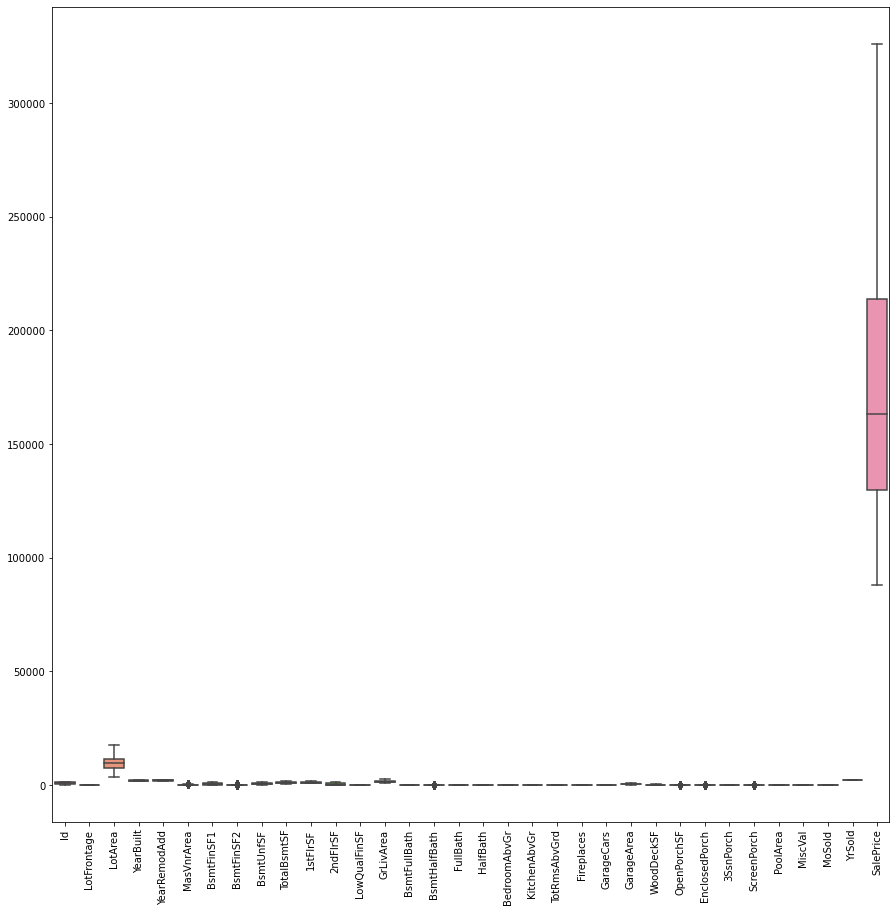

In [20]:
# Lets now check the boxplot after removal of outliers from Numeric data
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=house_num);

In [21]:
# Dummy Variables creation 
## One hot encoding the categorical columns
house_cat_dummy = pd.get_dummies(house_cat, drop_first=True)
house_cat_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageYrBlt_1932,GarageYrBlt_1933,GarageYrBlt_1934,GarageYrBlt_1935,GarageYrBlt_1936,GarageYrBlt_1937,GarageYrBlt_1938,GarageYrBlt_1939,Gara

In [22]:
#Check number of columns after dummy variables creation.
## One hot encoding the categorical columns
house_cat_dummy.shape

(1460, 353)

In [23]:
# Lets concatenate Numeric dataframe and Categorical values dataframe.
house_df = pd.concat([house_num, house_cat_dummy], axis=1)

In [24]:
# Now lets see the shape of dataframe after data cleaning.
house_df.shape

(1460, 387)

In [25]:
# Model Building 
X = house_df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918

In [26]:
## Separate out the target variable as y which we want to predict
y = house_df["SalePrice"].copy()
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

# Section 2: Model Creation
## Section 2.1 : Split the data into training and test data, & Scale the data.

In [27]:
# Import Library
from sklearn.model_selection import train_test_split


In [28]:
## Splitting X and y into 70% train data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100, shuffle=True)

In [29]:
#View Dimentions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1021, 385)
(1021,)
(438, 385)
(438,)


## Section 2.2 : Scaling Numeric variables.

In [30]:
## Lets take out Numeerical variables from X Train Datasets

num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [31]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918

In [32]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [33]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=385)

In [34]:
X_test.isna().sum()

LotFrontage              0
LotArea                  0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
MSSubClass_30            0
MSSubClass_40            0
MSSubClass_45            0
MSSubClass_50            0
MSSubClass_60            0
M

## Section 2.3 Building our model
### 1. Linear Regression Model

In [35]:
# Lets try Linear regression
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

4986119936609965.0
[ 5.17709876e+02  4.59585528e+03  9.48720342e+03  4.01494288e+03
  1.16133213e+03 -4.58530666e+02 -1.30003812e+03 -5.05257782e+03
  1.44753295e+04 -5.27172557e+03  2.89585996e+03 -2.39390368e+16
  2.47489797e+04  9.08564722e+02 -1.54336504e+03  6.22832456e+02
 -7.68786691e+02 -5.15680750e+02 -4.03004877e+16 -1.23105419e+03
 -3.91388780e+02 -1.15474465e+03  7.51142503e+03  1.89144365e+03
  8.62410527e+02  8.00843514e+01  2.70750032e+16  8.71116486e+01
 -1.28494918e+15  5.76761010e+15  7.84524297e+02 -5.07617643e+02
 -3.18345783e+03 -1.17877792e+04 -4.76980063e+03  8.75349369e+02
 -3.46096610e+03 -4.88299177e+03  1.35203226e+04 -1.47280761e+04
 -7.57743504e+03 -2.09031185e+15 -9.77219891e+03 -2.04160789e+04
 -1.97564289e+04  3.10497255e+14  1.31630866e+04  1.41694851e+04
  9.77104602e+03  6.54016404e+03 -3.33309417e+03  9.41946553e+02
  3.94141676e+03 -1.44338840e+03  1.00868532e+04  1.48385546e+03
 -4.62671098e+03  1.21067041e+03  2.04145160e+03 -1.28511955e+04
  5.28

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9669736539597301
-3.37472760066494e+20
141807271267.99994
6.0043579994874496e+32
138890569.31243873
1.370857990750559e+30


### 2. Ridge Regression Model



#Lets start with Rige Regression.

In [39]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [41]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.00651325e+03  4.12809964e+03  7.39461261e+03  4.62583692e+03
  1.34526105e+03  2.46627738e+03  7.59765729e+01 -2.78141700e+03
  1.08379786e+04  4.88416863e+02  6.08617989e+03  0.00000000e+00
  1.86766134e+04  1.05753586e+03 -1.06002558e+03  1.96795790e+02
  2.69501164e+02 -9.96494555e+02  0.00000000e+00 -7.20767535e+02
  1.81223692e+03  1.86033072e+03  5.10853491e+03  1.88764259e+03
  8.48555753e+02  3.65282601e+01  0.00000000e+00  2.81915955e+02
  0.00000000e+00  0.00000000e+00  3.02401060e+02 -4.38356180e+02
  2.61601025e+02 -1.34665439e+02  3.23749593e+03  9.13144487e+02
  5.22192345e+01  3.60544437e+03  3.14841881e+03 -7.53660232e+02
 -1.05787881e+03 -7.62203170e+03 -2.97248655e+03 -5.55396735e+03
 -2.99242006e+03 -6.47439799e+03  4.44380893e+03  3.32520854e+03
  3.26573579e+03 -1.40122100e+03 -1.14255300e+03  6.70607486e+02
  9.08819399e+02 -2.12895616e+02 -2.90648276e+03  4.99085292e+02
  4.46429104e+03  4.37447105e+03  5.50553236e+03 -1.62303844e+03
  5.94618631e+03 -2.90784

In [42]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9461045784713704
0.8908714931856481
231414115612.2615
194162818573.49554
226654373.7632336
443294106.33218163


In [43]:
#ridgeCV_results= pd.DataFrame(model_cv.cv_results_)
#ridgeCV_results

### 3. Lasso Regression Model

In [44]:
# Model 2 : Lasso  Regression

In [45]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [47]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [48]:
lasso.coef_

array([ 1.06916344e+03,  4.24739108e+03,  8.88391185e+03,  4.67502029e+03,
        1.40255193e+03,  4.24145740e+03,  0.00000000e+00, -7.47304737e+02,
        9.79799374e+03, -0.00000000e+00,  3.30427464e+03,  0.00000000e+00,
        2.02622499e+04,  1.35769560e+03, -8.20322376e+02,  0.00000000e+00,
        7.91564333e+02, -1.23165741e+03,  0.00000000e+00, -6.06624923e+02,
        2.17461168e+03,  9.09381107e+02,  4.72355624e+03,  1.95009837e+03,
        6.09835188e+02,  7.83160375e+01,  0.00000000e+00,  2.30366974e+02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.34174142e+02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.38252142e+04, -0.00000000e+00, -4.07726657e+03,
       -0.00000000e+00, -9.35604778e+03,  0.00000000e+00,  0.00000000e+00,
        1.09175207e+03, -2.49356675e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [49]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9403239504446753
0.8792992284992653
256234756856.72208
214752338162.6255
250964502.30824885
490302141.9238025


In [50]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.669737e-01,9.461046e-01,9.403240e-01
1,R2 Score (Test),-3.374728e+20,8.908715e-01,8.792992e-01
2,RSS (Train),1.418073e+11,2.314141e+11,2.562348e+11
3,RSS (Test),6.004358e+32,1.941628e+11,2.147523e+11
4,MSE (Train),1.178518e+04,1.505504e+04,1.584186e+04
5,MSE (Test),1.170836e+15,2.105455e+04,2.214277e+04


### Regularizarion of Model

In [51]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF


In [52]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_


In [53]:
betas

,Ridge,Lasso
LotFrontage,1006.513252,1069.163438
LotArea,4128.099644,4247.391075
YearBuilt,7394.612614,8883.911854
YearRemodAdd,4625.836920,4675.020292
MasVnrArea,1345.261054,1402.551929
BsmtFinSF1,2466.277382,4241.457402
BsmtFinSF2,75.976573,0.000000
BsmtUnfSF,-2781.417001,-747.304737
TotalBsmtSF,10837.978643,9797.993739
1stFlrSF,488.416863,-0.000000


In [54]:
betas['Ridge'].sort_values(ascending=False)[:10]


OverallQual_9           23403.988898
GrLivArea               18676.613359
OverallQual_8           16702.534733
OverallCond_9           15795.154996
Neighborhood_Crawfor    14311.411625
Functional_Typ          12327.237502
Exterior1st_BrkFace     11401.412104
TotalBsmtSF             10837.978643
Neighborhood_Somerst     9805.271426
PoolQC_NA                9650.921798
Name: Ridge, dtype: float64

### View the features removed by Lasso


In [55]:
betas[betas['Lasso']==0]

,Ridge,Lasso
BsmtFinSF2,75.976573,0.0
1stFlrSF,488.416863,-0.0
LowQualFinSF,0.000000,0.0
FullBath,196.795790,0.0
KitchenAbvGr,0.000000,0.0
3SsnPorch,0.000000,0.0
PoolArea,0.000000,0.0
MiscVal,0.000000,0.0
MoSold,302.401060,0.0
MSSubClass_30,261.601025,0.0


### View the number of features removed by lasso

In [56]:

betas[betas['Lasso']==0].shape

(275, 2)

### View the features selected by lasso

In [57]:

betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage               1069.163438
LotArea                   4247.391075
YearBuilt                 8883.911854
YearRemodAdd              4675.020292
MasVnrArea                1402.551929
BsmtFinSF1                4241.457402
BsmtUnfSF                 -747.304737
TotalBsmtSF               9797.993739
2ndFlrSF                  3304.274645
GrLivArea                20262.249918
BsmtFullBath              1357.695604
BsmtHalfBath              -820.322376
HalfBath                   791.564333
BedroomAbvGr             -1231.657410
TotRmsAbvGrd              -606.624923
Fireplaces                2174.611681
GarageCars                 909.381107
GarageArea                4723.556240
WoodDeckSF                1950.098366
OpenPorchSF                609.835188
EnclosedPorch               78.316037
ScreenPorch                230.366974
YrSold                    -334.174142
MSSubClass_90           -13825.214177
MSSubClass_160           -4077.266568
MSSubClass_190           -9356.047779
MSZoning_RL 

In [58]:
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           44328.829771
OverallQual_8           29593.822009
OverallCond_9           26485.020340
GrLivArea               20262.249918
Neighborhood_Crawfor    17864.650168
Exterior1st_BrkFace     16180.704150
Functional_Typ          14262.395419
Neighborhood_Somerst    12833.454946
Neighborhood_NoRidge    11122.563004
BsmtExposure_Gd         10642.957289
Name: Lasso, dtype: float64

# Coding for subjective question -


### Q1 What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented? 

In [59]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.09352038e+03  4.16025588e+03  6.68488287e+03  4.93380414e+03
  1.86082237e+03  3.18646228e+03  2.13335516e+02 -2.08509402e+03
  1.02154497e+04  1.99386032e+03  6.35229546e+03  0.00000000e+00
  1.69104954e+04  1.07600479e+03 -8.72357343e+02  2.17325931e+02
  6.99078541e+02 -1.16591212e+03  0.00000000e+00 -4.61395008e+02
  2.49685342e+03  2.15159656e+03  5.12399758e+03  1.89762928e+03
  9.61315371e+02  1.17495719e+02  0.00000000e+00  3.24285455e+02
  0.00000000e+00  0.00000000e+00  3.11469970e+02 -3.64103810e+02
 -1.49936540e+02  2.55506757e+02  2.42118991e+03  1.07637020e+03
  4.05458465e+02  3.74526915e+03  1.88899173e+03 -5.47265857e+02
 -7.54152035e+02 -6.59109189e+03 -2.10469042e+03 -4.15307855e+03
 -1.88585749e+03 -5.26117830e+03  4.08265367e+03  1.79674138e+03
  2.30966879e+03 -2.56495435e+03 -4.60128552e+02  1.06448759e+03
  8.06560653e+02  2.87327914e+01 -2.53202410e+03 -1.47906429e+01
  3.50413963e+03  2.99462277e+03  3.68362487e+03 -9.46117745e+02
  5.29079355e+03 -2.17151

In [60]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9384133511388473
0.8930143624091946
264438415648.27133
190350198567.74402
258999427.6672589
434589494.4469041


In [61]:
alpha =200

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 1.21508084e+03  4.58939959e+03  7.85379146e+03  5.32649447e+03
  9.89467014e+02  4.92487487e+03  1.42926472e+01 -1.29457602e+01
  9.02767277e+03 -0.00000000e+00  1.97259295e+03  0.00000000e+00
  2.07174391e+04  1.40636353e+03 -2.82996526e+02 -0.00000000e+00
  1.18167448e+03 -1.35436440e+03  0.00000000e+00 -2.36548372e+02
  3.05521661e+03  1.07599327e+03  4.78953217e+03  1.99401960e+03
  5.56539754e+02  0.00000000e+00  0.00000000e+00  2.14221404e+02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.14249325e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -9.68245177e+03 -0.00000000e+00 -2.14074637e+03
 -0.00000000e+00 -4.14782830e+03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.34738577e+03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  3.66834201e+03 -0.00000

In [62]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9259714840800918
0.8886702037358299
317860832252.5792
198079380584.18896
311323048.2395487
452236028.73102504


In [63]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.669737e-01,9.384134e-01,9.259715e-01
1,R2 Score (Test),-3.374728e+20,8.930144e-01,8.886702e-01
2,RSS (Train),1.418073e+11,2.644384e+11,3.178608e+11
3,RSS (Test),6.004358e+32,1.903502e+11,1.980794e+11
4,MSE (Train),1.178518e+04,1.609346e+04,1.764435e+04
5,MSE (Test),1.170836e+15,2.084681e+04,2.126584e+04


In [64]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF


In [65]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
LotFrontage,1093.520378,1215.080845
LotArea,4160.255883,4589.399586
YearBuilt,6684.882868,7853.791463
YearRemodAdd,4933.804139,5326.494472
MasVnrArea,1860.822369,989.467014
BsmtFinSF1,3186.462278,4924.874866
BsmtFinSF2,213.335516,14.292647
BsmtUnfSF,-2085.094024,-12.945760
TotalBsmtSF,10215.449687,9027.672769
1stFlrSF,1993.860322,-0.000000


In [66]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           18330.420783
GrLivArea               16910.495440
OverallQual_8           15302.972717
Neighborhood_Crawfor    11430.141195
Functional_Typ          10705.796016
OverallCond_9           10523.415571
TotalBsmtSF             10215.449687
Exterior1st_BrkFace      9011.950279
Neighborhood_Somerst     8238.282720
Neighborhood_NridgHt     7886.605314
Name: Ridge, dtype: float64

In [67]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           44778.937876
OverallQual_8           30454.828407
GrLivArea               20717.439127
Neighborhood_Crawfor    15900.528081
Functional_Typ          13983.299695
OverallCond_9           12800.600369
Exterior1st_BrkFace     11750.660741
OverallQual_7           10355.511152
Neighborhood_Somerst    10266.145005
BsmtExposure_Gd          9197.501411
Name: Lasso, dtype: float64

### Q1 After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now? 

In [68]:
## Lets remove top 5 feature
Lasso_5 = ['OverallQual_9','OverallQual_8','GrLivArea','Neighborhood_Crawfor', 'Functional_Typ']

In [69]:
X_train_2 = X_train.drop(Lasso_5, axis=1)
X_test_2 = X_test.drop(Lasso_5, axis=1)

In [70]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cv.fit(X_train_2, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
model_cv.best_params_

{'alpha': 50}

In [72]:
lasso = Lasso(alpha=50)

In [73]:
lasso.fit(X_train_2, y_train) 

Lasso(alpha=50)

In [74]:
lasso.coef_

array([ 1.02756615e+03,  4.68175048e+03,  7.89760360e+03,  4.22608348e+03,
        2.09809065e+03,  4.64862443e+03,  4.01408987e+02, -6.59632367e+02,
        1.11608976e+04,  1.17888164e+04,  1.91745506e+04,  0.00000000e+00,
        1.30552527e+03, -1.13523413e+03,  4.31810282e+02,  7.86841676e+02,
       -8.86233320e+02,  0.00000000e+00,  2.49033401e+02,  2.15971846e+03,
        8.48550650e+01,  5.78108987e+03,  1.89102199e+03,  1.12712436e+03,
        3.78299651e+02,  0.00000000e+00,  2.01687086e+02,  0.00000000e+00,
        0.00000000e+00,  5.48361445e+02, -6.36228029e+02, -0.00000000e+00,
        0.00000000e+00,  3.62697138e+03,  0.00000000e+00, -0.00000000e+00,
        3.10997276e+03,  0.00000000e+00, -1.76796783e+03, -0.00000000e+00,
       -1.37485855e+04, -1.67001515e+03, -8.29234030e+03, -0.00000000e+00,
       -1.23319607e+04,  6.55973210e+02,  0.00000000e+00,  6.45738810e+02,
       -4.58300784e+03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [75]:
y_train_pred = lasso.predict(X_train_2)
y_pred = lasso.predict(X_test_2)

In [76]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_2)
y_pred_test = lasso.predict(X_test_2)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9474108206919802
0.8404086818750598
225805422337.68994
283946890244.8375
221161040.48745343
648280571.3352455


In [77]:
betas = pd.DataFrame(index=X_train_2.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF


In [78]:
betas['Lasso'] = lasso.coef_
betas

,Lasso
LotFrontage,1027.566149
LotArea,4681.750476
YearBuilt,7897.603603
YearRemodAdd,4226.083475
MasVnrArea,2098.090646
BsmtFinSF1,4648.624428
BsmtFinSF2,401.408987
BsmtUnfSF,-659.632367
TotalBsmtSF,11160.897622
1stFlrSF,11788.816363


In [79]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallCond_9          36330.074935
2ndFlrSF               19174.550553
Exterior1st_BrkFace    18745.850110
OverallCond_7          15062.010480
OverallCond_8          14080.692576
Condition2_PosA        13176.512849
GarageYrBlt_2008       12289.651581
1stFlrSF               11788.816363
GarageYrBlt_1939       11241.860533
TotalBsmtSF            11160.897622
Name: Lasso, dtype: float64

# So after top 5 features from Lasso are removed, we now have below top 5 #features from Lasso- 
### OverallCond_9          
### 2ndFlrSF               
### Exterior1st_BrkFace   
### OverallCond_7          
### OverallCond_8          